In [5]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

data = pd.read_csv("creditcard_2023.csv")

data = data.drop(0)

In [6]:
# Calculating the R-squared

# Split the data into independent and dependent variables
X = data.iloc[:, :-1]
y = data.iloc[:, -1]

# Training
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

regressor = LinearRegression()

regressor.fit(X_train, y_train)

y_pred = regressor.predict(X_test)

r_squared = r2_score(y_test, y_pred)
print("R-squared:", r_squared)


R-squared: 0.8708824979040558


In [7]:
from sklearn.metrics import confusion_matrix

# Convert regression output to binary predictions using a threshold
threshold = 0.5
binary_predictions = (y_pred > threshold).astype(int)

# Construct confusion matrix
conf_matrix = confusion_matrix(y_test, binary_predictions)

# Display confusion matrix
print("Confusion Matrix:")
print(conf_matrix)


Confusion Matrix:
[[70906   168]
 [ 1361 69723]]


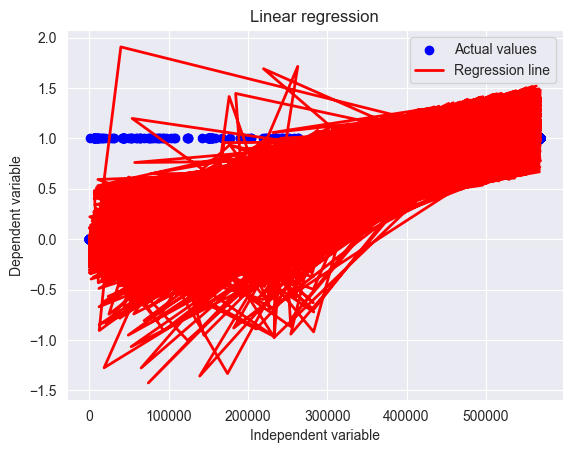

In [8]:
# Plot the regression line
plt.scatter(X_test.iloc[:, 0], y_test, color="blue", label="Actual values")
plt.plot(X_test.iloc[:, 0], y_pred, color="red", linewidth=2, label="Regression line")

plt.xlabel("Independent variable")
plt.ylabel("Dependent variable")

plt.title("Linear regression")

plt.legend()
plt.show()